# MUSHROOM DATA CLASSIFICATION

# LOADING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# EXPLORATORY DATA ANALYSIS

In [15]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [20]:
df[df['class'] == 'e']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l


#### CHECKING THE BALANCE OF THE TARGET CLASS

<Axes: xlabel='count', ylabel='class'>

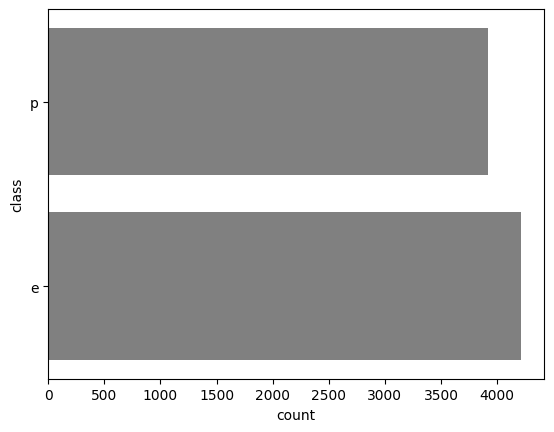

In [13]:
sns.countplot(df['class'],color='grey')

The balance between p and e in target class is almost equally balanced.

#### Checking for null values

In [23]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We have no missing values in the data.

#### Checking for duplicate values.

In [24]:
df.duplicated().sum()

0

We have no duplicate value in the data.

#### Observations: 
1. We have no missing and duplicate values in our data.
2. The balance of target class is almost equal.
3. We only have three ordinal columns: gill-spacing, gill-size and ring-number.
4. veil-type has only 1 unique value which is redundant in this data.

# DATA PRE-PROCESSING

#### Dropping veil-type column (redundant).

In [25]:
df.drop('veil-type',axis=1,inplace=True)

#### Mapping the ordinal features

In [31]:
gs_map = {
    'c' : 0,
    'w' : 1,
    'd' : 2
}

gsize_map = {
    'b' : 0,
    'n' : 1
}

rn_map = {
    'n' : 0,
    'o' : 1,
    't' : 2
}

In [32]:
df['ring-number'] = df['ring-number'].map(rn_map)
df['gill-spacing'] = df['gill-spacing'].map(gs_map)
df['gill-size'] = df['gill-size'].map(gsize_map)

#### Making dummies for nominal feeatures

In [34]:
dummy_cols = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-type',
       'spore-print-color', 'population', 'habitat']

In [35]:
main_df = pd.get_dummies(df[dummy_cols])

In [40]:
main_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class,gill-spacing,gill-size,ring-number
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,1,0,1,1
1,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,0,0,0,1
2,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,1
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,1,0,1,1
4,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,0,1,0,1


#### Integrating the ordinal features and target col into the main df

In [37]:
main_df['class'] = df['class'].map({'e':0,'p':1})

In [39]:
main_df['gill-spacing'] = df['gill-spacing']
main_df['gill-size'] = df['gill-size']
main_df['ring-number'] = df['ring-number']

# SPLITTING THE DATA INTO TRAIN AND TEST AND FITTING THE MODEL

In [41]:
X = main_df.drop('class',axis=1)
y = main_df['class']

In [42]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Logistic Regression

In [44]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

y_pred = model.predict(X_test)

display(classification_report(y_test,y_pred))

print('\n\n')

display(confusion_matrix(y_test,y_pred))


ValueError: y should be a 1d array, got an array of shape (1625, 112) instead.